<a href="https://colab.research.google.com/github/FelipePascual/Proyecto-Final-ML-Juan-Aristizabal/blob/main/Proyecto_Final_ML_Juan_Aristizabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL – MODELO SUPERVISADO CON EL DATASET "taxis"

Este notebook desarrolla las fases técnicas de CRISP-DM:

1. **Data Understanding**
2. **Data Preparation (Parte I y II)**
3. **Modeling**
4. **Evaluation**

Las fases **Business Understanding** y **Deployment conceptual** se documentan en Word.


In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance

import joblib
import warnings
warnings.filterwarnings("ignore")


# 1) Carga del dataset y vista inicial
El dataset requerido se carga utilizando `seaborn.load_dataset("taxis")`


In [75]:
taxis = sns.load_dataset("taxis")
print("Dataset cargado correctamente. Filas:", taxis.shape[0], " Columnas:", taxis.shape[1])
display(taxis.head())
display(taxis.info())


Dataset cargado correctamente. Filas: 6433  Columnas: 14


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

None

# 2) Exploración inicial
Resumen estadístico, tipos de variables y conteo de nulos.


In [76]:
print("\n--- Resumen estadístico ---")
display(taxis.describe(include="all"))

print("\n--- Valores nulos por columna ---")
display(taxis.isna().sum())



--- Resumen estadístico ---


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000,NaN,NaN,NaN,NaN,NaN,NaN



--- Valores nulos por columna ---


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


## 2.1 Distribución de la variable objetivo `fare`


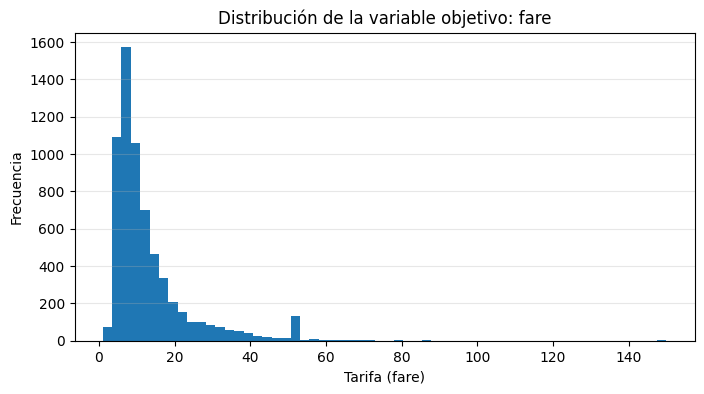

In [77]:
plt.figure(figsize=(8,4))
plt.hist(taxis["fare"].dropna(), bins=60)
plt.title("Distribución de la variable objetivo: fare")
plt.xlabel("Tarifa (fare)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.3)
plt.show()


## 2.2 Visualizaciones
Incluyen relaciones entre:

- Distance vs fare  
- Payment vs fare  
- Zonas y tarifa  
- Correlación entre variables numéricas


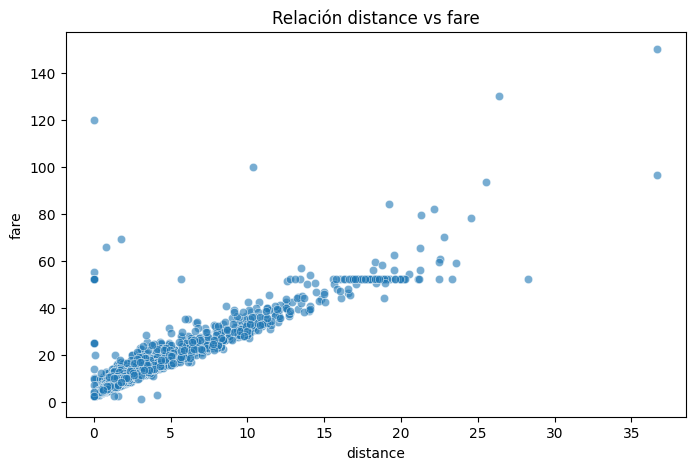

In [78]:
sample = taxis.sample(3000, random_state=42) if len(taxis)>3000 else taxis

plt.figure(figsize=(8,5))
sns.scatterplot(data=sample, x="distance", y="fare", alpha=0.6)
plt.title("Relación distance vs fare")
plt.show()


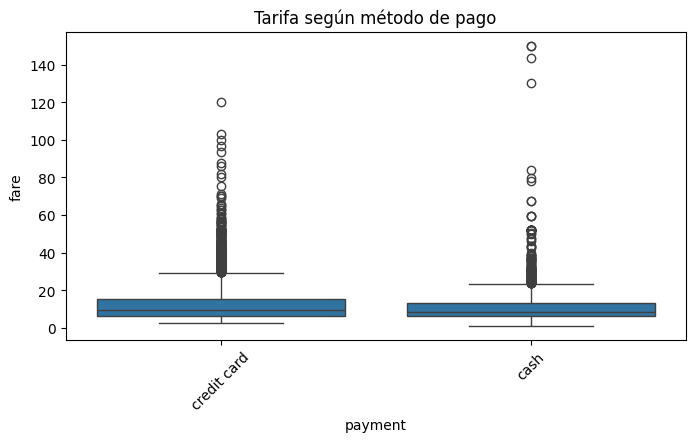

In [79]:
plt.figure(figsize=(8,4))
sns.boxplot(data=taxis, x="payment", y="fare")
plt.title("Tarifa según método de pago")
plt.xticks(rotation=45)
plt.show()


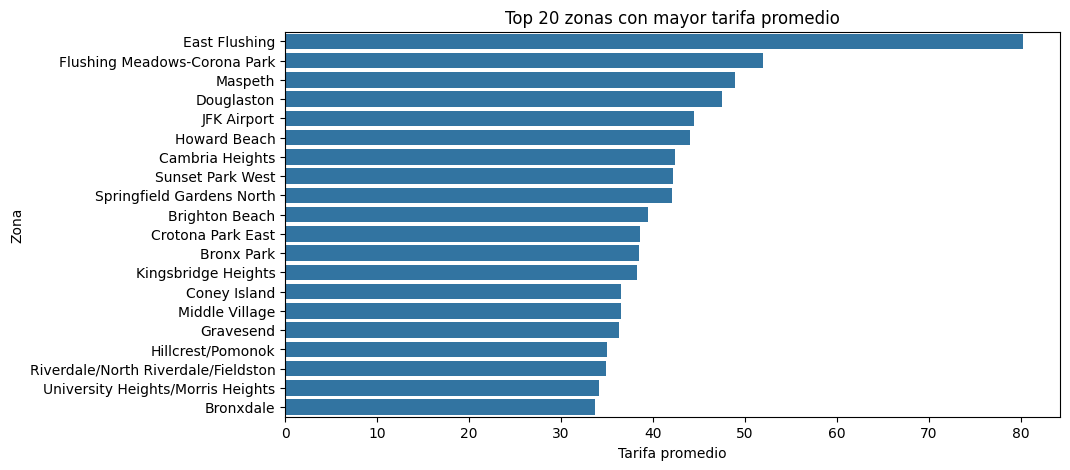

In [80]:
zonas = taxis.groupby("pickup_zone")["fare"].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=zonas.values, y=zonas.index)
plt.title("Top 20 zonas con mayor tarifa promedio")
plt.xlabel("Tarifa promedio")
plt.ylabel("Zona")
plt.show()


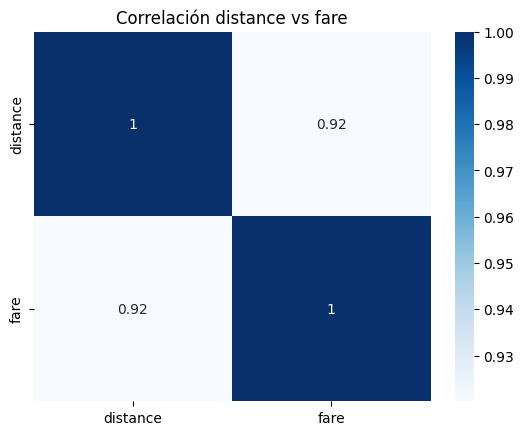

In [81]:
sns.heatmap(taxis[["distance","fare"]].corr(), annot=True, cmap="Blues")
plt.title("Correlación distance vs fare")
plt.show()


## 2.3 Detección de outliers usando boxplot e IQR


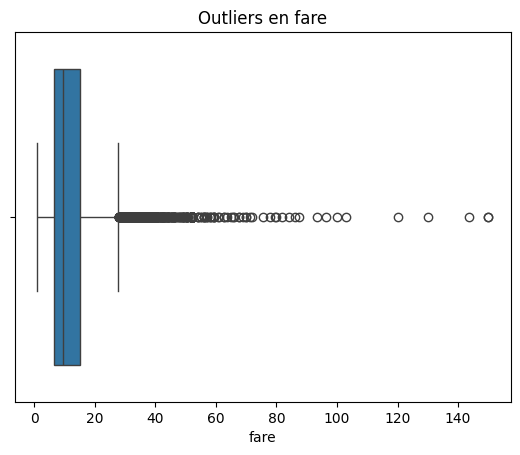

Outliers detectados: 592 de 6433 datos


In [82]:
# Boxplot
sns.boxplot(x=taxis["fare"])
plt.title("Outliers en fare")
plt.show()

# IQR
fare = taxis["fare"]
Q1 = fare.quantile(0.25)
Q3 = fare.quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

outliers = ((fare < lb) | (fare > ub)).sum()
print("Outliers detectados:", outliers, "de 6433 datos")


# 3) Preparación de datos — Parte I
Incluye imputación y eliminación de datos corruptos.


In [83]:
antes = taxis.shape[0]
taxis = taxis[(taxis["fare"] > 0) & (taxis["distance"] > 0)]
print("Filas eliminadas por valores imposibles:", antes - taxis.shape[0])

taxis = taxis.fillna({
    "pickup_zone": "Unknown",
    "dropoff_zone": "Unknown",
    "payment": "Unknown"
})


Filas eliminadas por valores imposibles: 51


# 4) Preparación de datos — Parte II
Estandarización + One-Hot Encoding + selección de variables.


In [84]:
target = "fare"
features = ["distance", "pickup_zone", "dropoff_zone", "payment"]

X = taxis[features]
y = taxis[target]

num_features = ["distance"]
cat_features = ["pickup_zone","dropoff_zone","payment"]

preprocessor = ColumnTransformer(
    [
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


# 5) Modelado
Se entrenan 3 modelos supervisados:
- Regresión Linear
- Regresión por árbol de decisión
- Regresión por árbol aleatorio


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

pipeline_lr = Pipeline([("prep", preprocessor), ("model", LinearRegression())])
pipeline_dt = Pipeline([("prep", preprocessor), ("model", DecisionTreeRegressor(random_state=42))])
pipeline_rf = Pipeline([("prep", preprocessor), ("model", RandomForestRegressor(random_state=42))])

pipeline_lr.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pickup_zone',
                                                   'dropoff_zone',
                                                   'payment'])])),
                ('model', RandomForestRegressor(random_state=42))])

# 6) Evaluación de modelos
Incluye R², MAE, MSE, RMSE y comparación.


In [86]:
def eval_model(name, model):
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)

    print(f"\nModelo: {name}")
    print("R²:", round(r2,4))
    print("MAE:", round(mae,4))
    print("MSE:", round(mse,4))
    print("RMSE:", round(rmse,4))

    return {"modelo": name, "r2": r2, "mae": mae, "mse": mse, "rmse": rmse}

res_lr = eval_model("Regresión Lineal", pipeline_lr)
res_dt = eval_model("Árbol de Decisión", pipeline_dt)
res_rf = eval_model("Random Forest", pipeline_rf)

df_res = pd.DataFrame([res_lr, res_dt, res_rf])
display(df_res.sort_values("r2", ascending=False))



Modelo: Regresión Lineal
R²: 0.8861
MAE: 1.8762
MSE: 12.3924
RMSE: 3.5203

Modelo: Árbol de Decisión
R²: 0.8838
MAE: 2.0138
MSE: 12.6424
RMSE: 3.5556

Modelo: Random Forest
R²: 0.9261
MAE: 1.5994
MSE: 8.0418
RMSE: 2.8358


,modelo,r2,mae,mse,rmse
2,Random Forest,0.926064,1.599422,8.041784,2.835804
0,Regresión Lineal,0.886065,1.876151,12.392406,3.520285
1,Árbol de Decisión,0.883766,2.013786,12.642450,3.555622


# 7) Elección del mejor modelo (según R² y MAE)


In [87]:
mejor = df_res.sort_values("r2", ascending=False).iloc[0]
print("Mejor modelo:", mejor["modelo"])
display(mejor)


Mejor modelo: Random Forest


,2
modelo,Random Forest
r2,0.926064
mae,1.599422
mse,8.041784
rmse,2.835804


# 8) Análisis ético y de sesgos

- El dataset puede tener sesgos geográficos según zonas con más/menos datos.

- El modelo podría subestimar tarifas en zonas poco representadas.

- Recomendación: evaluar desempeño por zona y hacer reponderación si es necesario.


# 9) Guardar el mejor modelo (Deployment técnico)


In [88]:
if mejor["modelo"] == "Random Forest":
    best_model = pipeline_rf
elif mejor["modelo"] == "Árbol de Decisión":
    best_model = pipeline_dt
else:
    best_model = pipeline_lr

joblib.dump(best_model, "mejor_modelo_taxis.joblib")

print("Modelo guardado como mejor_modelo_taxis.joblib")


Modelo guardado como mejor_modelo_taxis.joblib
